# 5.1 Statistical modelling with statsmodels

## 5.1.1 Business understanding

## 5.1.2 Data loading

In [1]:
import os
os.chdir(r'C:\Users\JQW\Pythondata\Doctor_three\Codes')

print(os.getcwd())

C:\Users\JQW\Pythondata\Doctor_three\Codes


In [2]:
import pandas as pd
import numpy as np    
df_women = pd.read_csv('women.csv', index_col=0)

print(df_women.head())


   height  weight
1      58     115
2      59     117
3      60     120
4      61     123
5      62     126


## 5.1.3 Data understanding

In [3]:
df_women.shape

(15, 2)

In [4]:
print(df_women.columns)

Index(['height', 'weight'], dtype='object')


In [5]:
df_women.describe()

,height,weight
count,15.000000,15.000000
mean,65.000000,136.733333
std,4.472136,15.498694
min,58.000000,115.000000
25%,61.500000,124.500000
50%,65.000000,135.000000
75%,68.500000,148.000000
max,72.000000,164.000000


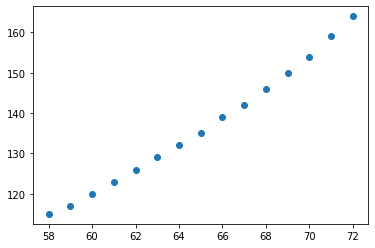

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df_women["height"], df_women["weight"])
plt.show()

## 5.1.4 Data wrangling

In [7]:
X = df_women["height"]
y = df_women["weight"]

In [8]:
X

1     58
2     59
3     60
4     61
5     62
6     63
7     64
8     65
9     66
10    67
11    68
12    69
13    70
14    71
15    72
Name: height, dtype: int64

In [9]:
y

1     115
2     117
3     120
4     123
5     126
6     129
7     132
8     135
9     139
10    142
11    146
12    150
13    154
14    159
15    164
Name: weight, dtype: int64

## 5.1.5 Model selection and hyperparameter tuning

In [10]:
import statsmodels.api as sm

In [11]:
X

1     58
2     59
3     60
4     61
5     62
6     63
7     64
8     65
9     66
10    67
11    68
12    69
13    70
14    71
15    72
Name: height, dtype: int64

In [12]:
X_add_const=sm.add_constant(X) 
X_add_const

,const,height
1,1.0,58
2,1.0,59
3,1.0,60
4,1.0,61
5,1.0,62
6,1.0,63
7,1.0,64
8,1.0,65
9,1.0,66
10,1.0,67


In [13]:
myModel = sm.OLS(y, X_add_const)

## 5.1.6 Fitting model and summarizing the Regression Results

In [14]:
results = myModel.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1433.
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           1.09e-14
Time:                        14:23:14   Log-Likelihood:                -26.541
No. Observations:                  15   AIC:                             57.08
Df Residuals:                      13   BIC:                             58.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -87.5167      5.937    -14.741      0.0

D:\ANACONDA\22222\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [15]:
results.params

const    -87.516667
height     3.450000
dtype: float64

## 5.1.7 Model evaluation

In [16]:
results.rsquared

0.9910098326857506

## 5.1.8 Assumptions testing

In [17]:
results.f_pvalue

1.0909729585997406e-14

In [18]:
sm.stats.stattools.durbin_watson(results.resid)

0.31538037486218456

In [19]:
sm.stats.stattools.jarque_bera(results.resid)

(1.6595730644310005,
 0.43614237873238126,
 0.7893583826332368,
 2.5963042257390314)

In [20]:
y_predict=results.predict()
y_predict

array([112.58333333, 116.03333333, 119.48333333, 122.93333333,
       126.38333333, 129.83333333, 133.28333333, 136.73333333,
       140.18333333, 143.63333333, 147.08333333, 150.53333333,
       153.98333333, 157.43333333, 160.88333333])

## 5.1.9 Model optimization and re-selection

Text(0, 0.5, 'weight')

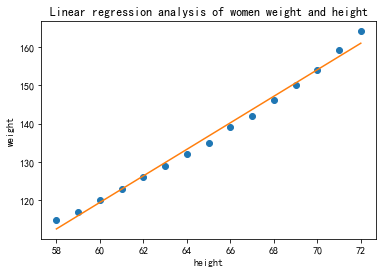

In [21]:
plt.rcParams['font.family']="simHei" 
plt.plot(df_women["height"], df_women["weight"],"o")
plt.plot(df_women["height"], y_predict)
plt.title('Linear regression analysis of women weight and height')
plt.xlabel('height')
plt.ylabel('weight')   

In [22]:
import pandas as pd
import numpy as np    
df_women = pd.read_csv('women.csv', index_col=0)
X = df_women["height"]
y = df_women["weight"]

X=np.column_stack((X, np.power(X,2), np.power(X,3)))

In [23]:
X_add_const=sm.add_constant(X) 

X_add_const

array([[1.00000e+00, 5.80000e+01, 3.36400e+03, 1.95112e+05],
       [1.00000e+00, 5.90000e+01, 3.48100e+03, 2.05379e+05],
       [1.00000e+00, 6.00000e+01, 3.60000e+03, 2.16000e+05],
       [1.00000e+00, 6.10000e+01, 3.72100e+03, 2.26981e+05],
       [1.00000e+00, 6.20000e+01, 3.84400e+03, 2.38328e+05],
       [1.00000e+00, 6.30000e+01, 3.96900e+03, 2.50047e+05],
       [1.00000e+00, 6.40000e+01, 4.09600e+03, 2.62144e+05],
       [1.00000e+00, 6.50000e+01, 4.22500e+03, 2.74625e+05],
       [1.00000e+00, 6.60000e+01, 4.35600e+03, 2.87496e+05],
       [1.00000e+00, 6.70000e+01, 4.48900e+03, 3.00763e+05],
       [1.00000e+00, 6.80000e+01, 4.62400e+03, 3.14432e+05],
       [1.00000e+00, 6.90000e+01, 4.76100e+03, 3.28509e+05],
       [1.00000e+00, 7.00000e+01, 4.90000e+03, 3.43000e+05],
       [1.00000e+00, 7.10000e+01, 5.04100e+03, 3.57911e+05],
       [1.00000e+00, 7.20000e+01, 5.18400e+03, 3.73248e+05]])

In [24]:
myModel_updated = sm.OLS(y, X_add_const)

In [25]:
results_updated = myModel_updated.fit()
print(results_updated.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.679e+04
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           2.07e-20
Time:                        14:23:15   Log-Likelihood:                 1.3441
No. Observations:                  15   AIC:                             5.312
Df Residuals:                      11   BIC:                             8.144
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -896.7476    294.575     -3.044      0.0

D:\ANACONDA\22222\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [26]:
print('Display const and intercept: ',results_updated.params)

Display const and intercept:  const   -896.747633
x1        46.410789
x2        -0.746184
x3         0.004253
dtype: float64


In [27]:
y_predict_updated=results_updated.predict()
y_predict_updated

array([114.63856209, 117.40676937, 120.18801264, 123.00780722,
       125.89166846, 128.86511168, 131.95365223, 135.18280543,
       138.57808662, 142.16501113, 145.9690943 , 150.01585147,
       154.33079796, 158.93944911, 163.86732026])

Text(0, 0.5, 'weight')

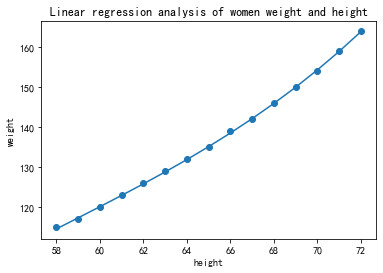

In [28]:
plt.rcParams['font.family']="simHei" 
plt.scatter(df_women["height"], df_women["weight"])
plt.plot(df_women["height"], y_predict_updated)
plt.title('Linear regression analysis of women weight and height')
plt.xlabel('height')
plt.ylabel('weight')   

## 5.1.10 Model application

In [29]:
h=63.5
results_updated.predict([1,h,np.power(h,2),np.power(h,3)])

array([130.39340008])